Importing necessary libraries:

In [ ]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/PatientsReview - Sheet1.csv")

Exploratory Data Analysis

In [ ]:
df.head()

,Hospital,Patient's Review,Class
0,Well Key Health,Took my 8-year-old daughter for a UTI. The sta...,1
1,Well Key Health,My 7 year old son just went for his 2nd visit ...,1
2,Well Key Health,I appreciate the cleanliness of the office! Su...,1
3,Well Key Health,I was treated with respect and the staff had a...,1
4,Well Key Health,The nurse was amazing. She was very caring and...,1


In [ ]:
df.columns

Index(['Hospital', 'Patient's Review', 'Class'], dtype='object')

In [ ]:
print("Dimension of dataset: ", df.shape)

Dimension of dataset:  (149, 3)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Hospital          149 non-null    object
 1   Patient's Review  149 non-null    object
 2   Class             149 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.6+ KB


In [ ]:
df.dtypes

Hospital            object
Patient's Review    object
Class                int64
dtype: object

In [ ]:
# Checking for null values
np.sum(df.isnull().any(axis = 1))

0

In [ ]:
# Checking unique target  values (There are 2 values: 0: negative & 1: positive)
df["Class"].unique()

array([1, 0])

Data Visualization

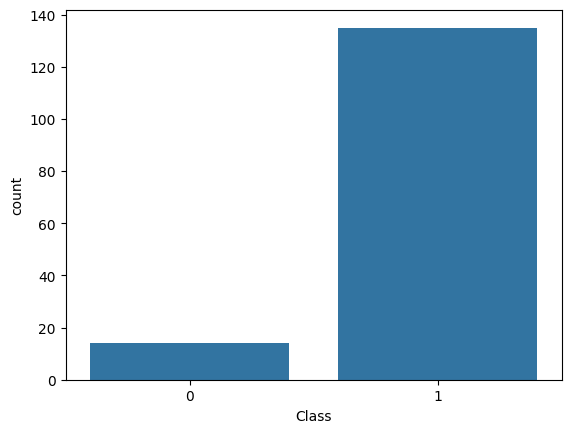

In [ ]:
# Plotting the distribution of target variables for dataset:
sns.countplot(x = "Class", data = df)

# Storing data in lists:
text, sentiment = list(df["Patient's Review"]), list(df["Class"])

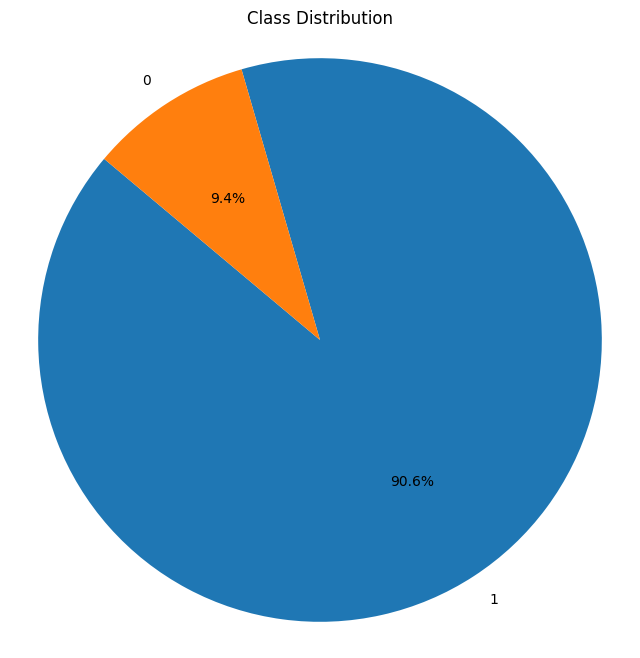

In [ ]:
# Pie chart for Class distribution
class_counts = df['Class'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Data preprocessing

In [ ]:
# We choose only two columns for the analysis
data = df[["Patient's Review", "Class"]]

In [ ]:
# Separating positive & negative tweets
data_positive =  data[data["Class"] == 1]
data_negative = data[data["Class"] == 0]

In [ ]:
# Training the model on smaller sample size:
data_pos  = data_positive.iloc[:int(20000)]
data_neg = data_negative.iloc[:int(20000)]

In [ ]:
# combining positive & negative tweets
dataset = pd.concat([data_pos, data_neg])

In [ ]:
# lower cases text:
dataset["Patient's Review"] = dataset["Patient's Review"].str.lower()
dataset["Patient's Review"].head()

0    took my 8-year-old daughter for a uti. the sta...
1    my 7 year old son just went for his 2nd visit ...
2    i appreciate the cleanliness of the office! su...
3    i was treated with respect and the staff had a...
4    the nurse was amazing. she was very caring and...
Name: Patient's Review, dtype: object

In [ ]:
# Defining set of all stopwords (search on the internet):

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
# Cleaning & remove stop words

def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in set(stopwordlist)])

dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda text1: cleaning_stopwords(text1))

In [ ]:
# The cleaned dataset after stopwords removal:
dataset["Patient's Review"].head()

0    took 8-year-old daughter uti. staff phenomenal...
1    7 year old son went 2nd visit well-key. visits...
2    appreciate cleanliness office! great benefit o...
3    treated respect staff professional attitude. w...
4    nurse amazing. caring sweet. knew helpful. eve...
Name: Patient's Review, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset["Patient's Review"]= dataset["Patient's Review"].apply(lambda x: cleaning_punctuations(x))
dataset["Patient's Review"].tail()

142    it’s worst hospitaldont go therefully money mi...
143    look money never respond back refunddoctor alw...
145    filling january days later pressure teeth and ...
147    expensive multiple speciality hospitals poor f...
148    hospital extremely unprofessional nurses extre...
Name: Patient's Review, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', "", data)
dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda x: cleaning_numbers(x))
dataset["Patient's Review"].head()

0    took yearold daughter uti staff phenomenal bet...
1     year old son went nd visit wellkey visits sun...
2    appreciate cleanliness office great benefit of...
3    treated respect staff professional attitude wo...
4    nurse amazing caring sweet knew helpful ever n...
Name: Patient's Review, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset["Patient's Review"] = dataset["Patient's Review"].apply(tokenizer.tokenize)
dataset.head()

,Patient's Review,Class
0,"[took, yearold, daughter, uti, staff, phenomen...",1
1,"[year, old, son, went, nd, visit, wellkey, vis...",1
2,"[appreciate, cleanliness, office, great, benef...",1
3,"[treated, respect, staff, professional, attitu...",1
4,"[nurse, amazing, caring, sweet, knew, helpful,...",1


In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda x: stemming_on_text(x))
dataset["Patient's Review"].head()

0    [took, yearold, daughter, uti, staff, phenomen...
1    [year, old, son, went, nd, visit, wellkey, vis...
2    [appreciate, cleanliness, office, great, benef...
3    [treated, respect, staff, professional, attitu...
4    [nurse, amazing, caring, sweet, knew, helpful,...
Name: Patient's Review, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')

lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset["Patient's Review"] = dataset["Patient's Review"].apply(lambda x: lemmatizer_on_text(x))
dataset["Patient's Review"].head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [took, yearold, daughter, uti, staff, phenomen...
1    [year, old, son, went, nd, visit, wellkey, vis...
2    [appreciate, cleanliness, office, great, benef...
3    [treated, respect, staff, professional, attitu...
4    [nurse, amazing, caring, sweet, knew, helpful,...
Name: Patient's Review, dtype: object

In [ ]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [ ]:
x

array([['Well Key Health',
        'Took my 8-year-old daughter for a UTI. The staff was phenomenal and better with kids than most places just for kids. Wish I got their names but the lady at check-in and the nurse or MA who took her vitals you ladies deserve a raise and recognition for your excellent attitudes and service. Much obliged.'],
       ['Well Key Health',
        'My 7 year old son just went for his 2nd visit to Well-Key. Both visits were on a Sunday evening. We were in and out in under an hour both times, with hardly any wait time. Even for a weekend night, the staff was super friendly and kind, from check-in to check out. Everyone made sure he got a Popsicle and stickers and said they hoped he felt better. A note for school was ready at check out. The prescription was ready as soon as we got to the pharmacy. I cannot say enough good things. I’ve told everyone I know what a great place this is! Thanks so much Well-Key!'],
       ['Well Key Health',
        'I appreciate th

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0])

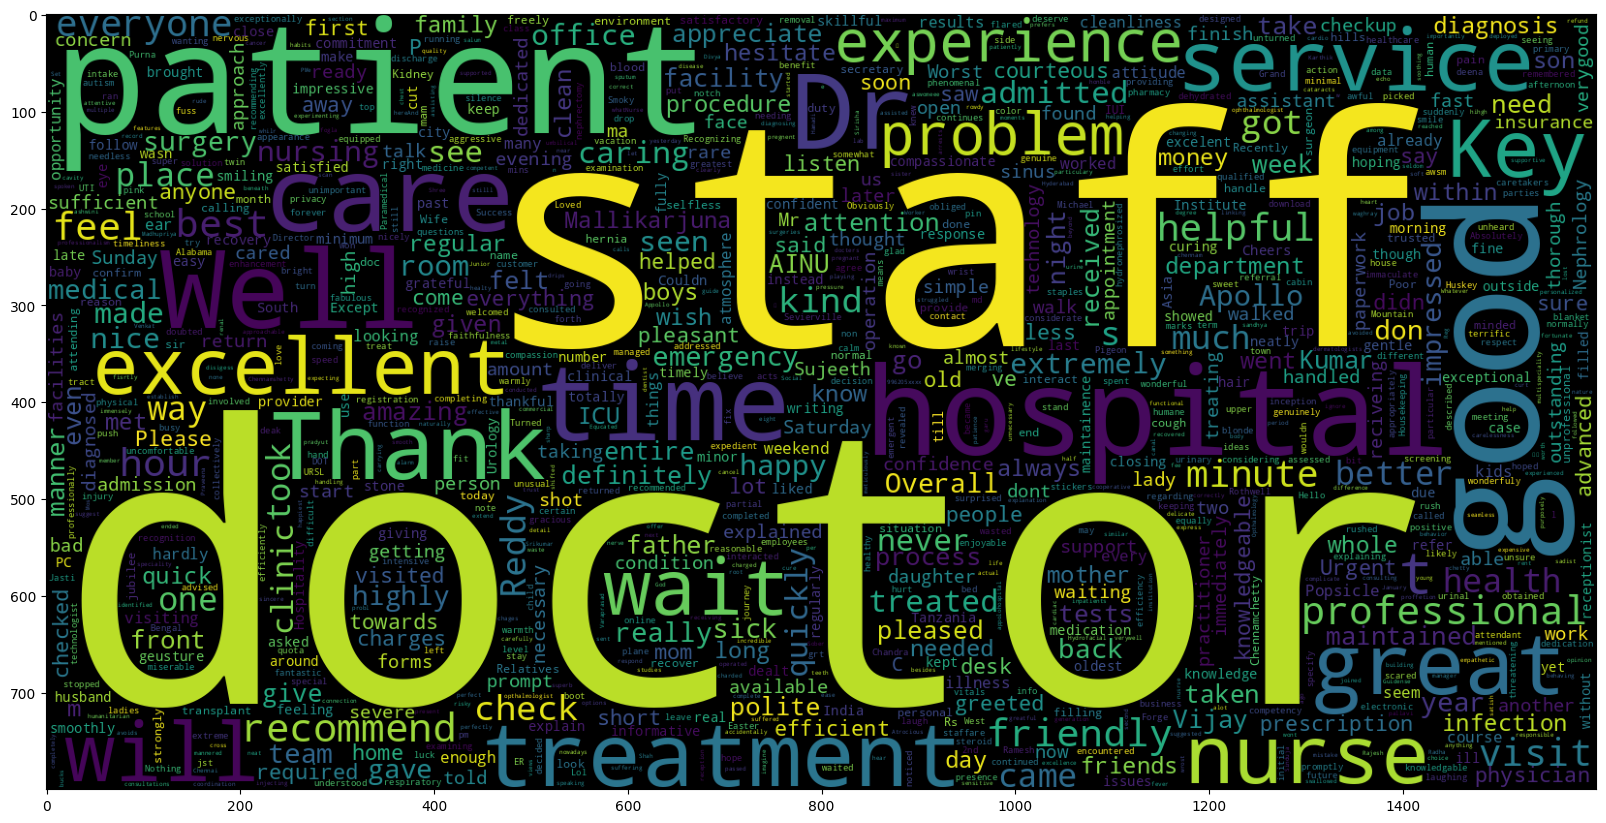

In [ ]:
data_neg = data["Patient's Review"][:20000]
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 1000, width = 1600, height = 800,collocations = False).generate(" ".join(data_neg))
plt.imshow(wc)

In [ ]:
data_pos = data["Patient's Review"][158000:]
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 10, width = 1600, height = 800,collocations = False).generate(" ".join(data_pos))
plt.imshow(wc)

ValueError: We need at least 1 word to plot a word cloud, got 0.

<Figure size 2000x2000 with 0 Axes>

Model building

Splitting dataset

In [ ]:
# Separating 90% for training and 10% for test
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state = 42)

In [ ]:
X_train

array([['Well Key Health',
        'I had sick twin boys. The staff was able to process us quickly and get us in a room. They saw both boys at the same time which was nice. And the nurses and the doctor were knowledgeable and very nice and caring. The boys even got a popsicle to finish out their visit.'],
       ['Apollo hospital',
        'Had a bad experience in this hospital for my Mom. I’m writing this after my Mom passed away 15 days back.She was admitted in ICU and she suffered two cardiac arrests because of carelessness by the nurses , staff who were deployed in the hospital.Poor..'],
       ['AINU',
        'Attention given by the doctors and staff is good. I am impressed and feel to refer any patient, who required treatment at AINU'],
       ['Well Key Health',
        'I was extremely pleased to visit a doctor who showed genuine concern and took time to talk to me. Most physicians make you feel uncomfortable and as if your thoughts and ideas are unimportant. The entire staff 

In [ ]:
X_test

array([['AINU',
        'Good maintainence of rooms. Nice geusture by nursing staff. Overall had a very good experience and feel at home. Good job. Cheers..!'],
       ['Well Key Health',
        'Very professional, yet friendly Doctor and staff. In and out quick.'],
       ['Apollo hospital',
        'The care and hospitality is very incredible besides healty treatment , tests & consultations for my father. I highly recommend everyone to visit the hospital. Thank you.'],
       ['AINU',
        'Wish the team a Grand Success, a bright future and good speed.'],
       ['AINU',
        'Doctors and Nursing staff very caring, we had very good treatment here. Thanks to Team of AINU'],
       ['Well Key Health',
        'Obviously I was not feeling well when I stopped at this facility for care. And great care is what I received! From the receptionist to the nurse to the doctor. The office is exceptionally clean and I was in and out in less than an hour. Everyone that I came in contact with

In [ ]:
import numpy as np
def join_str(row):
    return " ".join(map(str, row))

X_train = [join_str(item) for item in pd.Series.tolist(X_train)]
X_test   = [join_str(item) for item in pd.Series.tolist(X_test)]

AttributeError: 'numpy.ndarray' object has no attribute '_values'

In [ ]:
import numpy as np

def convert_to_string(row):
    # Initialize an empty string to store the concatenated elements
    string_row = ""

    # Iterate over each element in the row
    for item in row:
        # Convert each element to a string and concatenate it with a space
        string_row += str(item) + " "

    # Return the concatenated string, removing the trailing space
    return string_row.strip()

# Transforming X_train and X_test
X_train_strings = [convert_to_string(row) for row in X_train]
X_test_strings = [convert_to_string(row) for row in X_test]

print("X_train as strings:", X_train_strings)
print("X_test as strings:", X_test_strings)

X_train as strings: ['Well Key Health I had sick twin boys. The staff was able to process us quickly and get us in a room. They saw both boys at the same time which was nice. And the nurses and the doctor were knowledgeable and very nice and caring. The boys even got a popsicle to finish out their visit.', 'Apollo hospital Had a bad experience in this hospital for my Mom. I’m writing this after my Mom passed away 15 days back.She was admitted in ICU and she suffered two cardiac arrests because of carelessness by the nurses , staff who were deployed in the hospital.Poor..', 'AINU Attention given by the doctors and staff is good. I am impressed and feel to refer any patient, who required treatment at AINU', 'Well Key Health I was extremely pleased to visit a doctor who showed genuine concern and took time to talk to me. Most physicians make you feel uncomfortable and as if your thoughts and ideas are unimportant. The entire staff was so helpful and considerate.', 'Apollo hospital Persona

Transforming the data using TF-IDF Vectorizer

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train_strings)

TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train = vectoriser.transform(X_train_strings)
X_test  = vectoriser.transform(X_test_strings)

Model Evaluation:

In [ ]:
def model_Evaluate(model):
# Predict values for Test dataset
  y_pred = model.predict(X_test)
# Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
# Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Model building:

Bernoulli Naive Bayes Classifier

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      1.00      0.97        14

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



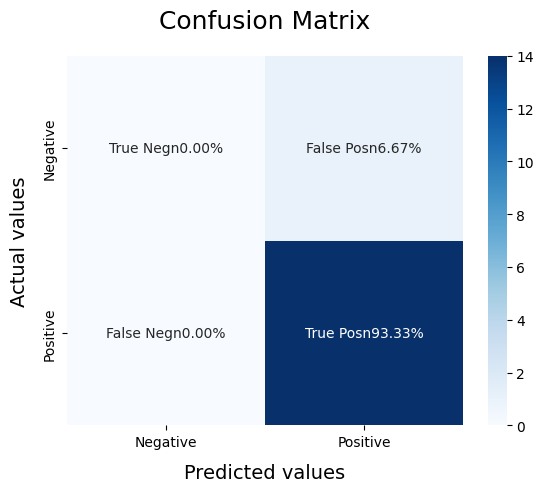

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

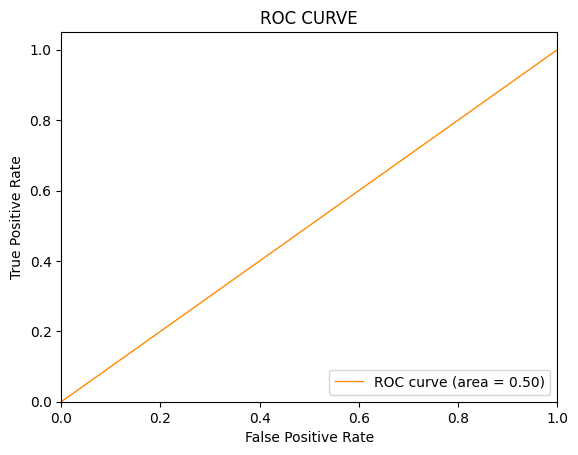

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Support Vector Machine:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      1.00      0.97        14

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



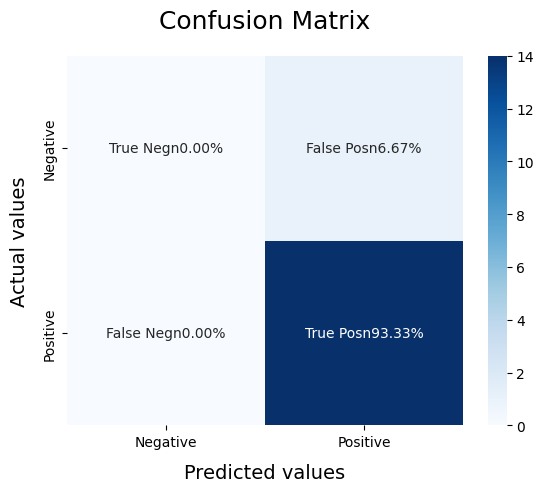

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

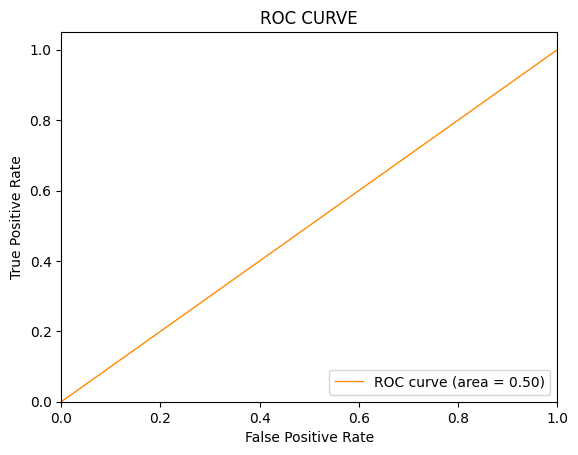

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

Logistic Regression:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.93      1.00      0.97        14

    accuracy                           0.93        15
   macro avg       0.47      0.50      0.48        15
weighted avg       0.87      0.93      0.90        15



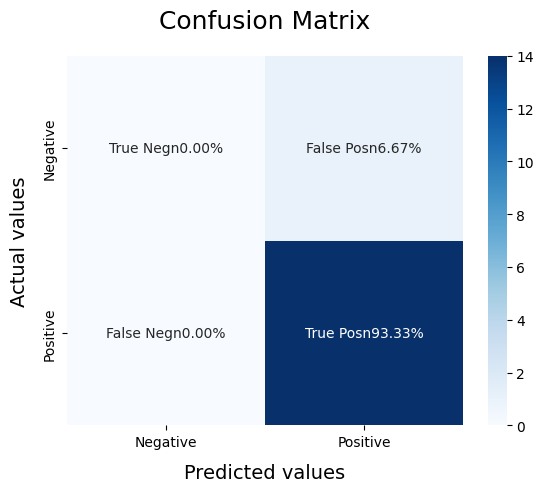

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

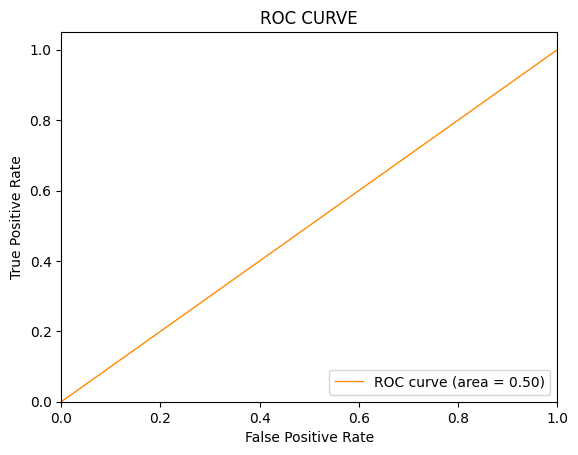

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()